In [78]:
# target parameters of f(x) = a + bx + cx^2 + dx^3
a = 2
b = -3
c = -2
d = 3

In [89]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1.5, 1.5, 500)
x_valid.sort()
y_target = a + b * x_valid + c* x_valid**2 + d * x_valid**3 # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a + b * x_train + c* x_train**2 + d * x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b * x_valid + c* x_valid**2 + d * x_valid**3, sigma)

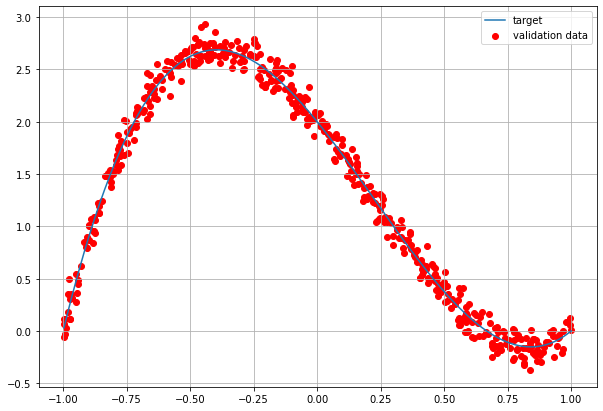

In [80]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
# model.add(Dense(1, input_shape=(1,)))

model.add(Dense(20, input_shape=(1,), activation='relu'))
# Adds another layer with 18 units, each connected to 27 outputs of previous layer
model.add(Dense(20, activation='relu'))

# Last layer with 9 units, each connected to 18 outputs of previous layer
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [82]:
# get a summary of our composed model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_21 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 21        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [83]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=100, epochs=60,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/60
50/50 [==============================] - 1s 6ms/step - loss: 1.2154 - mse: 1.2154 - val_loss: 0.6994 - val_mse: 0.6994
Epoch 2/60
50/50 [==============================] - 0s 3ms/step - loss: 0.6128 - mse: 0.6128 - val_loss: 0.5650 - val_mse: 0.5650
Epoch 3/60
50/50 [==============================] - 0s 4ms/step - loss: 0.5227 - mse: 0.5227 - val_loss: 0.5096 - val_mse: 0.5096
Epoch 4/60
50/50 [==============================] - 0s 4ms/step - loss: 0.4727 - mse: 0.4727 - val_loss: 0.4644 - val_mse: 0.4644
Epoch 5/60
50/50 [==============================] - 0s 4ms/step - loss: 0.4303 - mse: 0.4303 - val_loss: 0.4232 - val_mse: 0.4232
Epoch 6/60
50/50 [==============================] - 0s 4ms/step - loss: 0.3886 - mse: 0.3886 - val_loss: 0.3814 - val_mse: 0.3814
Epoch 7/60
50/50 [==============================] - 0s 4ms/step - loss: 0.3460 - mse: 0.3460 - val_loss: 0.3373 - val_mse: 0.3373
Epoch 8/60
50/50 [==============================] - 0s 4ms/step - loss: 0.3033 - mse: 0.30

In [84]:
# return weights and biases
model.get_weights()

[array([[-0.12066441,  0.2331034 ,  0.54463553, -0.41793552,  0.1651566 ,
          0.38313368,  0.6866058 ,  0.45138428,  0.28910884, -0.62596697,
         -0.7349605 , -0.6780468 , -0.00370459, -0.96250933,  0.14150622,
          0.5197614 ,  0.24088411,  0.30486843,  0.27994335,  0.21568011]],
       dtype=float32),
 array([ 4.08543438e-01,  2.33307928e-01,  2.91650683e-01,  3.33109021e-01,
         5.85615575e-01,  2.68699408e-01,  1.82047009e-01,  8.77470002e-02,
        -1.22434296e-01, -4.14041907e-01, -2.64625996e-02,  3.93768220e-04,
         1.62764732e-02, -4.15521294e-01, -8.74095410e-02,  1.00333527e-01,
         3.19489054e-02,  3.05218697e-01,  5.32485507e-02,  1.51429161e-01],
       dtype=float32),
 array([[ 0.33462617,  0.36377746, -0.10150325,  0.28549686, -0.34551167,
         -0.02691392, -0.24126089,  0.35485965, -0.2275909 , -0.12113941,
          0.1446748 ,  0.41198435,  0.37573624,  0.31355542, -0.05535687,
         -0.01324891,  0.17006078, -0.36002964,  0.31

In [85]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


16/16 [==============================] - 0s 3ms/step - loss: 0.0126 - mse: 0.0126

Test loss: 0.012569666840136051
Test accuracy: 0.012569666840136051


In [86]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


16/16 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031

Test loss: 0.00306804315187037
Test accuracy: 0.00306804315187037


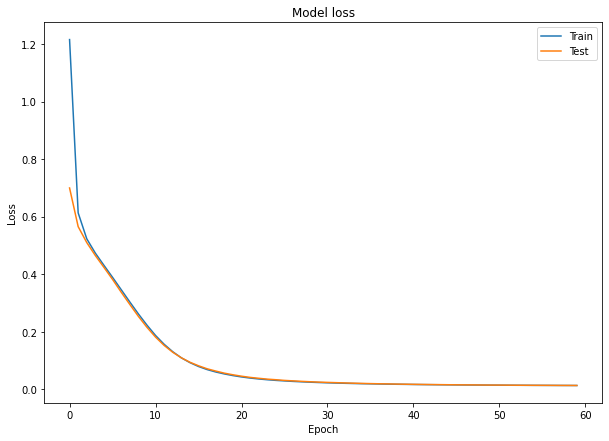

In [87]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

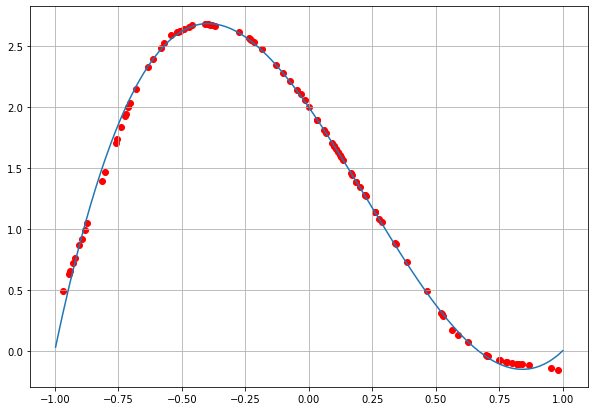

In [88]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.figure(figsize=(10, 7))
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

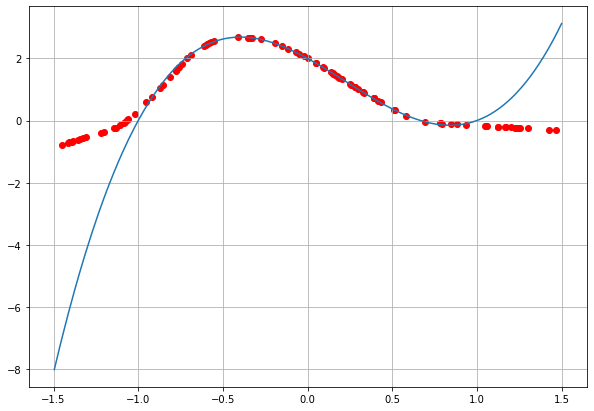

In [90]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = model.predict(x_predicted)
plt.figure(figsize=(10, 7))
plt.scatter(x_predicted, y_predicted,color='r')

#x_valid = np.random.uniform(-1.5, 1.5, 50)
#y_target = a + b * x_valid + c* x_valid**2 + d * x_valid**3 # ideal (target) linear function

plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()